In [1]:
! pip install opendatasets
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: div348
Your Kaggle Key: ··········


100%|██████████| 185M/185M [00:01<00:00, 138MB/s]


In [3]:
import csv
import pandas as pd

## Alphabet Dataset

In [4]:
data_a = pd.read_csv('/content/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv') 

In [5]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

## Numbers Dataset

In [6]:
data = mnist.load_data('mnist.db')

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
num_train, num_test = data

In [8]:
X_num_train , y_num_train = num_train
X_num_test , y_num_test = num_test

# ***Preparing Data***

In [9]:
y_num_train = y_num_train+26
y_num_test = y_num_test +26 
y_num_train =  pd.DataFrame(y_num_train)
y_num_test = pd.DataFrame(y_num_test)

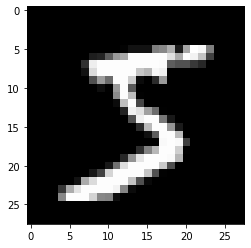

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_num_train[0],cmap = 'gray')

In [11]:
X_num_train = X_num_train.reshape(-1,28*28)
X_num_test = X_num_test.reshape(-1,28*28)

In [12]:
X_a = data_a[data_a.keys()[1:]]
y_a = data_a[data_a.keys()[0]]

In [13]:
from sklearn.model_selection import train_test_split
X_a_train,X_a_test,y_a_train,y_a_test = train_test_split(X_a,y_a,test_size = .2 , random_state=42)

In [14]:
from keras.utils.np_utils import to_categorical
X_train = np.vstack([X_a_train,X_num_train])
X_test  = np.vstack([X_a_test,X_num_test])
y_train = pd.concat([y_a_train,y_num_train], axis=0, ignore_index=True)
y_test  = pd.concat([y_a_test,y_num_test], axis=0, ignore_index=True)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# ***Model Training***

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K



In [16]:
model = Sequential()

In [17]:
model.add(
Convolution2D(
    filters=32,
    kernel_size=(3,3),
    input_shape=(28,28,1),
    activation='relu'
)
)
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(
MaxPooling2D(pool_size=(2,2))
) 
model.add(Dropout(0.5))
model.add(Flatten())

In [18]:
#model.add( Dense(units = '128' , activation = 'relu'))
model.add( Dense(units = '128', activation = 'relu'))
model.add( Dense(units = '64', activation = 'relu'))

model.add( Dense(units = '36', activation = 'softmax'))

In [19]:
from tensorflow.keras.optimizers import Adam

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [21]:
model.compile(  optimizer='Adam' ,
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [22]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),  epochs = 18)

Epoch 1/18
11187/11187 [==============================] - 653s 58ms/step - loss: 0.2898 - accuracy: 0.9212 - val_loss: 0.1128 - val_accuracy: 0.9689
Epoch 2/18
11187/11187 [==============================] - 657s 59ms/step - loss: 0.1482 - accuracy: 0.9576 - val_loss: 0.0958 - val_accuracy: 0.9742
Epoch 3/18
11187/11187 [==============================] - 657s 59ms/step - loss: 0.1230 - accuracy: 0.9647 - val_loss: 0.0797 - val_accuracy: 0.9783
Epoch 4/18
11187/11187 [==============================] - 673s 60ms/step - loss: 0.1103 - accuracy: 0.9687 - val_loss: 0.0836 - val_accuracy: 0.9778
Epoch 5/18
11187/11187 [==============================] - 674s 60ms/step - loss: 0.1028 - accuracy: 0.9710 - val_loss: 0.0738 - val_accuracy: 0.9799
Epoch 6/18
11187/11187 [==============================] - 671s 60ms/step - loss: 0.0974 - accuracy: 0.9728 - val_loss: 0.0747 - val_accuracy: 0.9802
Epoch 7/18
11187/11187 [==============================] - 668s 60ms/step - loss: 0.0944 - accuracy: 0.9733

In [23]:
model.save('alphanum_colab.h5')

### Accuracy Over all Epochs

In [31]:
history.history['accuracy']

[0.92115318775177,
 0.9576377272605896,
 0.964677631855011,
 0.9686557054519653,
 0.9710051417350769,
 0.972806990146637,
 0.9732763171195984,
 0.9751145243644714,
 0.9755252003669739,
 0.9763297438621521,
 0.9768940806388855,
 0.9772348999977112,
 0.9774192571640015,
 0.9777209758758545,
 0.9783411622047424,
 0.9778969883918762,
 0.9791429042816162,
 0.9794893264770508]

### Accuracy and Validation accuracy Graph

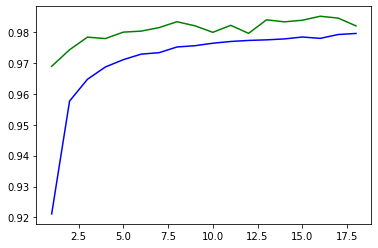

In [26]:
plt.plot(range(1,19), history.history['accuracy'], 'b', label='accuracy')
plt.plot(range(1,19), history.history['val_accuracy'], 'g', label='val loss')

### Loss and Validation loss Graph

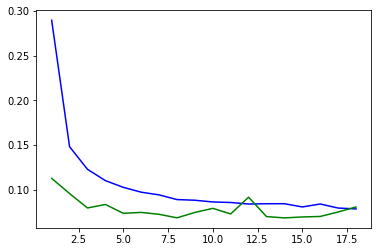

In [27]:
plt.plot(range(1,19), history.history['loss'], 'b', label='accuracy')
plt.plot(range(1,19), history.history['val_loss'], 'g', label='val loss')

## Model accuracy and loss

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100 , '%')

Test loss: 0.08082329481840134
Test accuracy: 98.19268584251404 %


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import shutil
shutil.copy('/content/alphanum_colab.h5','/content/gdrive/MyDrive/alphanum_project/alphanum_project.h5')
